In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import preprocessing

import numpy as np
import pylab as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
learning_rate = 0.001

no_features = 13
no_labels = 1
no_epochs = 200
batch_size = 32

seed = 10
tf.random.set_seed(seed)

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(x_train.shape)
print(y_test.shape)

(404, 13)
(102,)


In [4]:
model = Sequential([
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])

In [5]:
model.compile(optimizer='sgd',
              loss='mse')

In [6]:
history = model.fit(x_train, y_train, 
                    epochs=no_epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 - 2s - loss: 195.4792 - val_loss: 48.9686
Epoch 2/200
404/404 - 0s - loss: 30.5465 - val_loss: 24.6426
Epoch 3/200
404/404 - 0s - loss: 21.9112 - val_loss: 50.5633
Epoch 4/200
404/404 - 0s - loss: 21.1544 - val_loss: 19.3277
Epoch 5/200
404/404 - 0s - loss: 14.8456 - val_loss: 19.0432
Epoch 6/200
404/404 - 0s - loss: 14.2229 - val_loss: 18.4438
Epoch 7/200
404/404 - 0s - loss: 12.6097 - val_loss: 18.0769
Epoch 8/200
404/404 - 0s - loss: 13.3362 - val_loss: 15.5766
Epoch 9/200
404/404 - 0s - loss: 11.5601 - val_loss: 18.0935
Epoch 10/200
404/404 - 0s - loss: 11.1634 - val_loss: 17.2456
Epoch 11/200
404/404 - 0s - loss: 10.6963 - val_loss: 18.1796
Epoch 12/200
404/404 - 0s - loss: 11.4437 - val_loss: 20.2559
Epoch 13/200
404/404 - 0s - loss: 11.5613 - val_loss: 23.4468
Epoch 14/200
404/404 - 0s - loss: 10.2733 - val_loss: 19.3609
Epoch 15/200
404/404 - 0s - loss: 10.6315 - val_loss: 21.1192
Epoch 16/200
404/404 - 0s - loss

Epoch 134/200
404/404 - 0s - loss: 7.3082 - val_loss: 19.1126
Epoch 135/200
404/404 - 0s - loss: 7.7723 - val_loss: 18.7590
Epoch 136/200
404/404 - 0s - loss: 7.1065 - val_loss: 17.3633
Epoch 137/200
404/404 - 0s - loss: 7.6586 - val_loss: 19.1153
Epoch 138/200
404/404 - 0s - loss: 7.2684 - val_loss: 19.2975
Epoch 139/200
404/404 - 0s - loss: 7.7977 - val_loss: 17.5742
Epoch 140/200
404/404 - 0s - loss: 7.1086 - val_loss: 21.1278
Epoch 141/200
404/404 - 0s - loss: 7.3997 - val_loss: 17.6818
Epoch 142/200
404/404 - 0s - loss: 7.5979 - val_loss: 18.9893
Epoch 143/200
404/404 - 0s - loss: 7.2795 - val_loss: 19.9098
Epoch 144/200
404/404 - 0s - loss: 7.5263 - val_loss: 18.5936
Epoch 145/200
404/404 - 0s - loss: 7.0379 - val_loss: 16.7947
Epoch 146/200
404/404 - 0s - loss: 7.0028 - val_loss: 20.8307
Epoch 147/200
404/404 - 0s - loss: 7.1507 - val_loss: 17.9494
Epoch 148/200
404/404 - 0s - loss: 7.3977 - val_loss: 18.5582
Epoch 149/200
404/404 - 0s - loss: 7.2956 - val_loss: 17.8558
Epoch 15

In [11]:
# final errors
print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(history.history['loss'][-1], history.history['val_loss'][-1]))

train m.s.e. = 6.741, test m.s.e. = 20.380


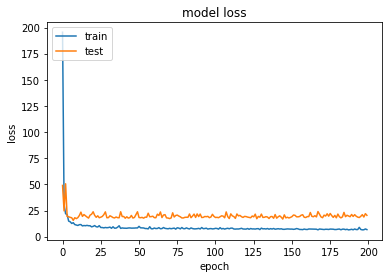

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/5.3a_1.png')